<a href="https://colab.research.google.com/github/shavindukesara/Telco-Churn-Predictor/blob/main/Telco%20Churn%20Predictor/source_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries imported successfully!
Dataset loaded: (7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  

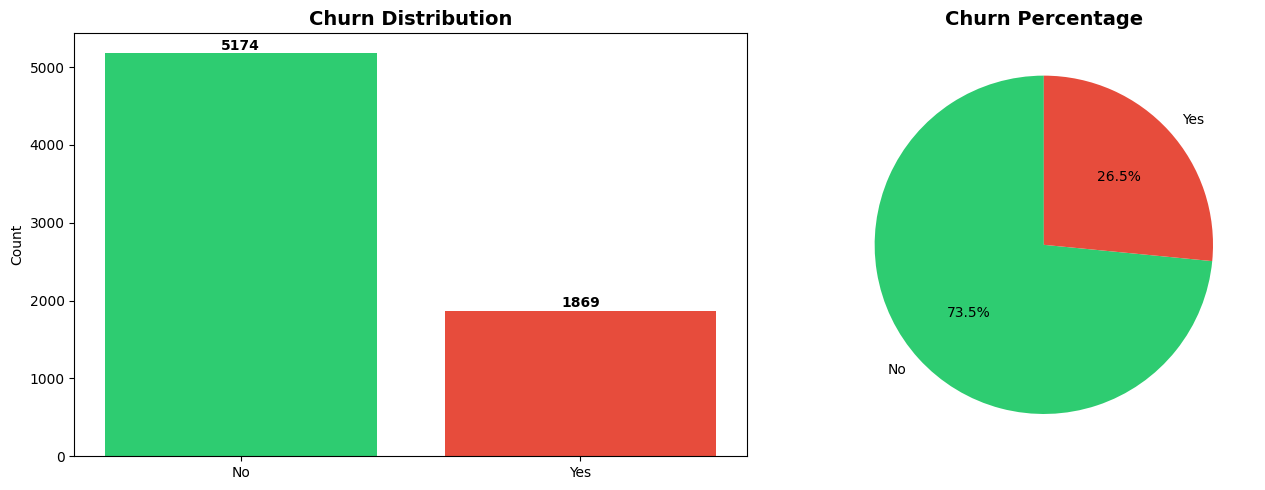


Insight: Imbalanced dataset - 73% No Churn, 27% Churn


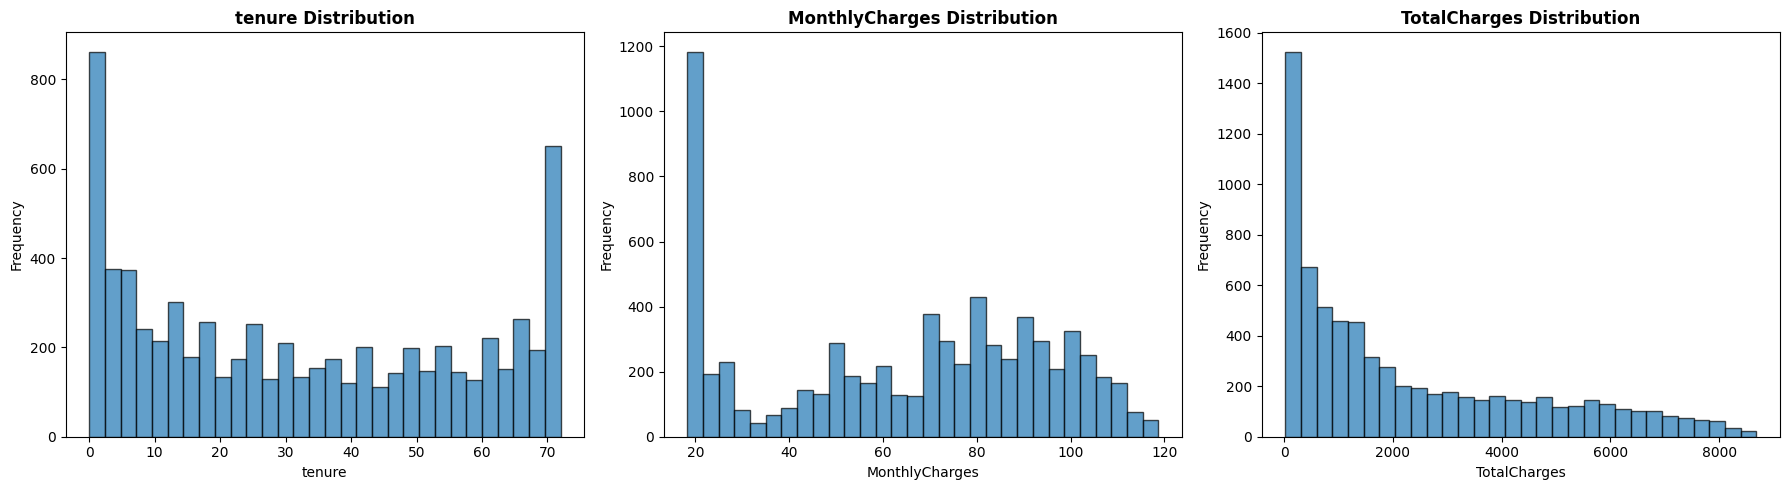

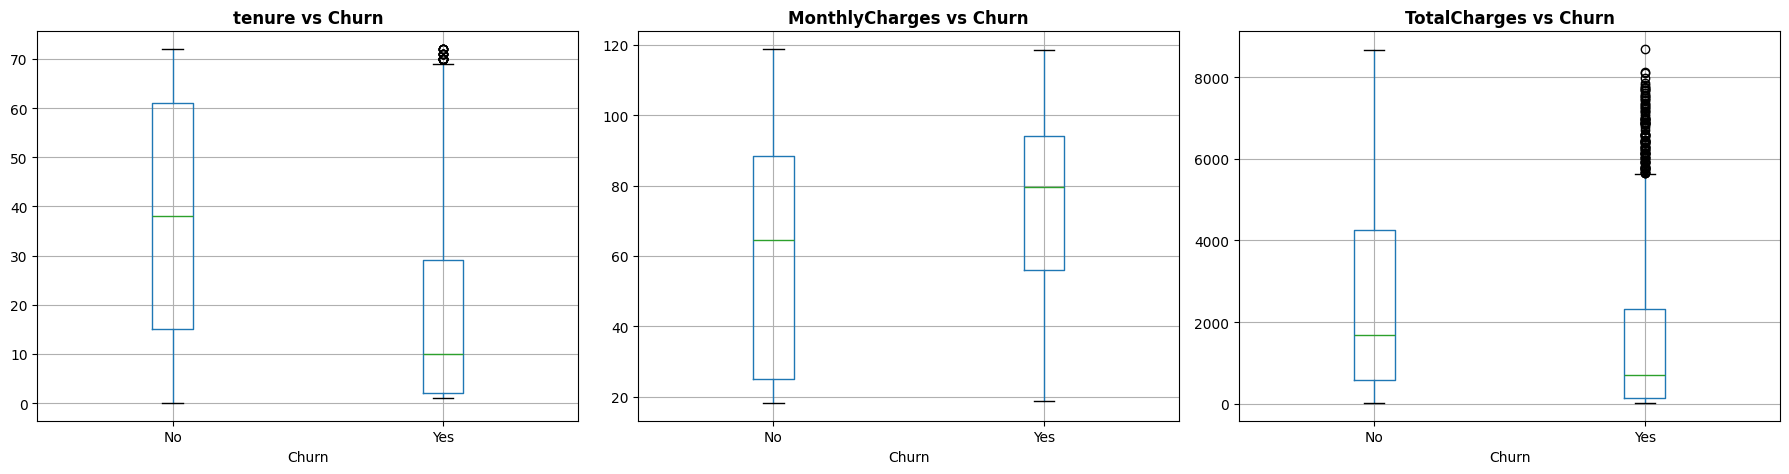


Insights:
- Churned customers have lower tenure (shorter relationship)
- Churned customers have higher monthly charges
- Churned customers have lower total charges


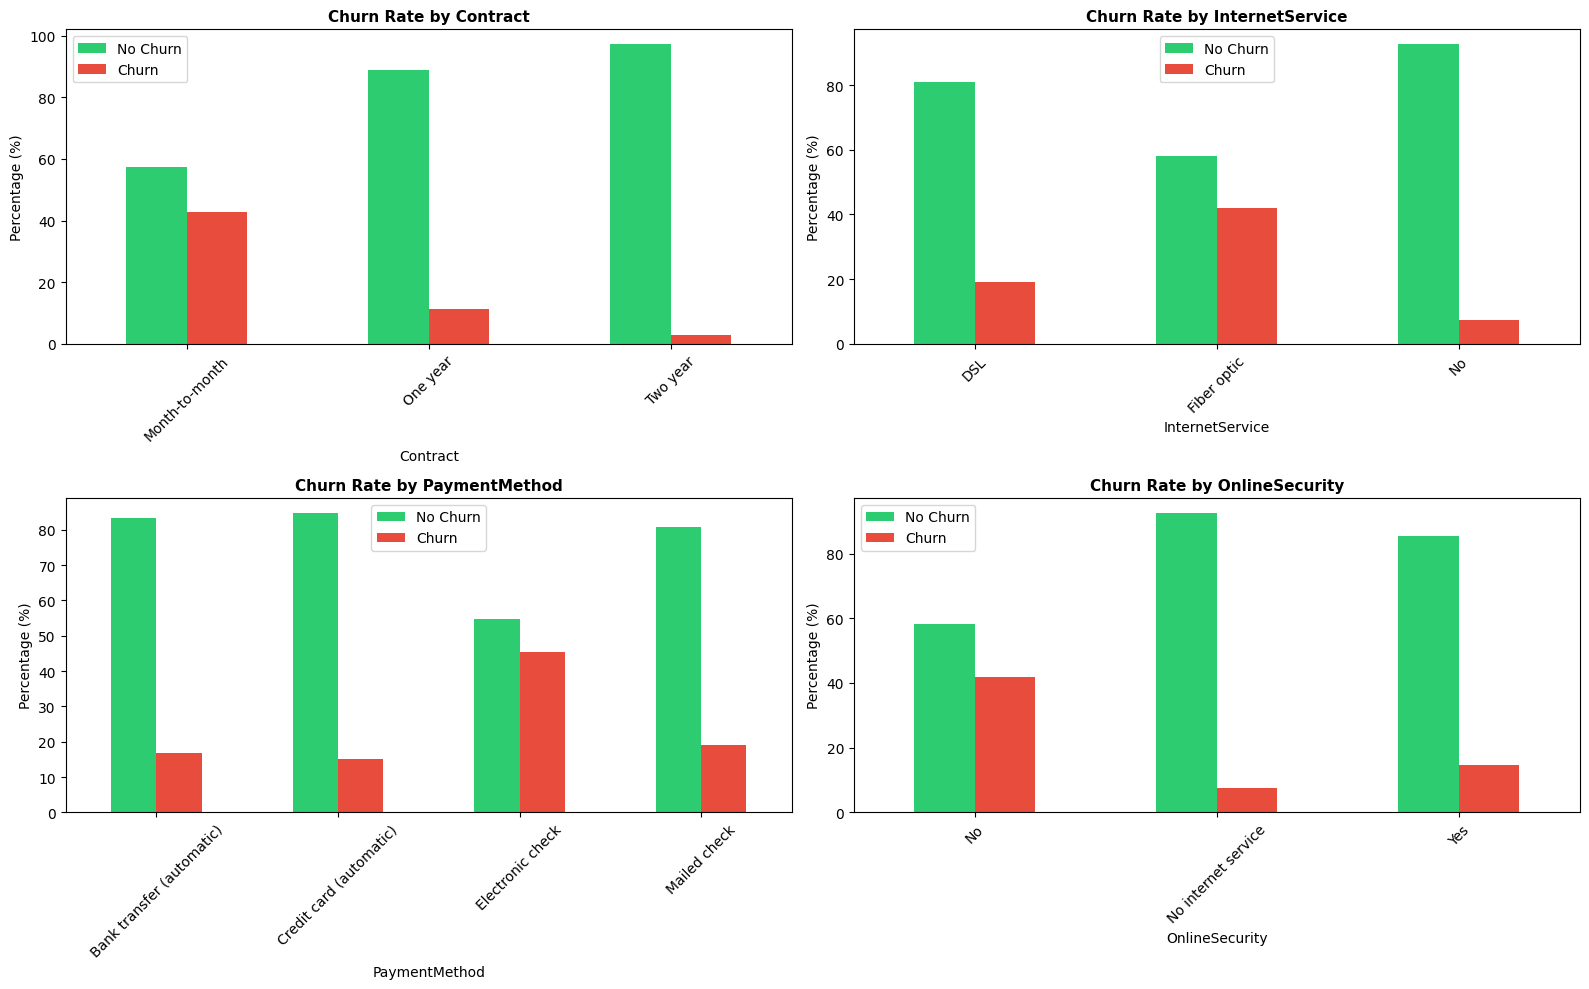


Key Findings:
- Month-to-month contracts: ~42% churn rate (HIGHEST)
- Fiber optic internet: Higher churn rate
- Electronic check payment: Higher churn rate
- No online security: Higher churn rate

--- Correlation Analysis ---


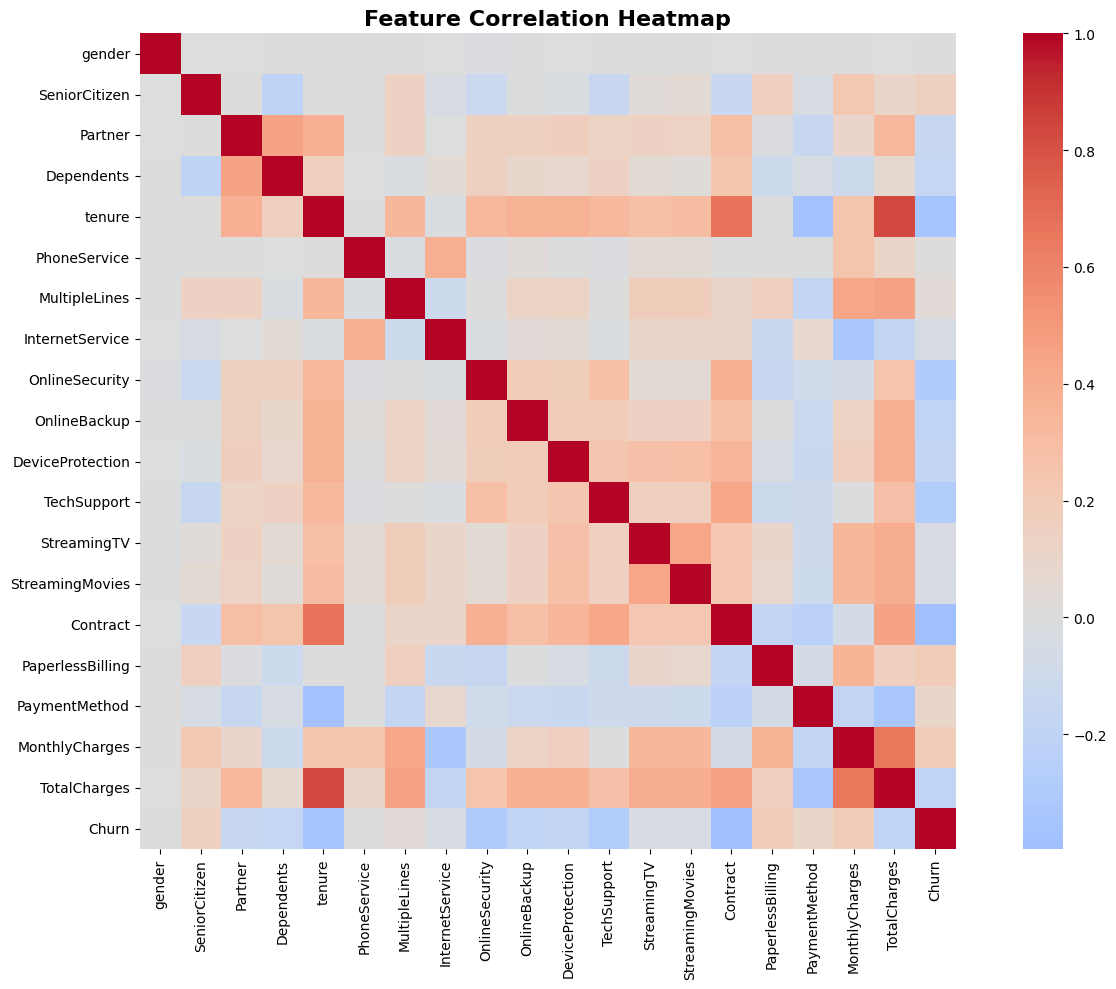


Top 10 Features Correlated with Churn:
Contract            0.396713
tenure              0.352229
OnlineSecurity      0.289309
TechSupport         0.282492
TotalCharges        0.199037
OnlineBackup        0.195525
MonthlyCharges      0.193356
PaperlessBilling    0.191825
DeviceProtection    0.178134
Dependents          0.164221
Name: Churn, dtype: float64


<Figure size 1000x600 with 0 Axes>

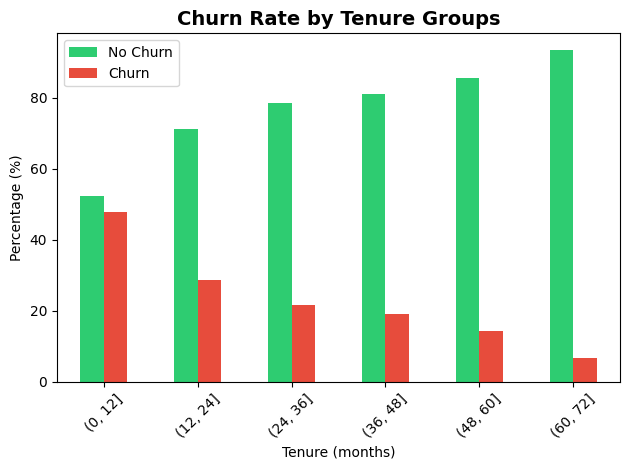


Insight: Churn rate decreases significantly with tenure

TASK 1 COMPLETE - EDA INSIGHTS SUMMARY

KEY FINDINGS:
1. Dataset is imbalanced (73% No Churn, 27% Churn)
2. Contract type is strongest predictor (month-to-month highest churn)
3. Tenure inversely correlated with churn
4. Monthly charges positively correlated with churn
5. Internet service type and payment method affect churn
6. Customers without add-on services churn more


DATA PREPROCESSING
Missing TotalCharges: 11
Features shape: (7043, 30)
Target distribution:
Churn
0    5174
1    1869
Name: count, dtype: int64
Training set: (5634, 30)
Test set: (1409, 30)
Preprocessing complete
Fitting 5 folds for each of 480 candidates, totalling 2400 fits

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 2}
Best CV ROC-AUC: 0.8255

--- DECISION TREE RESULTS ---
              precision    recall  f1-score   support

    No Churn       0.83      0.91      0.87      1

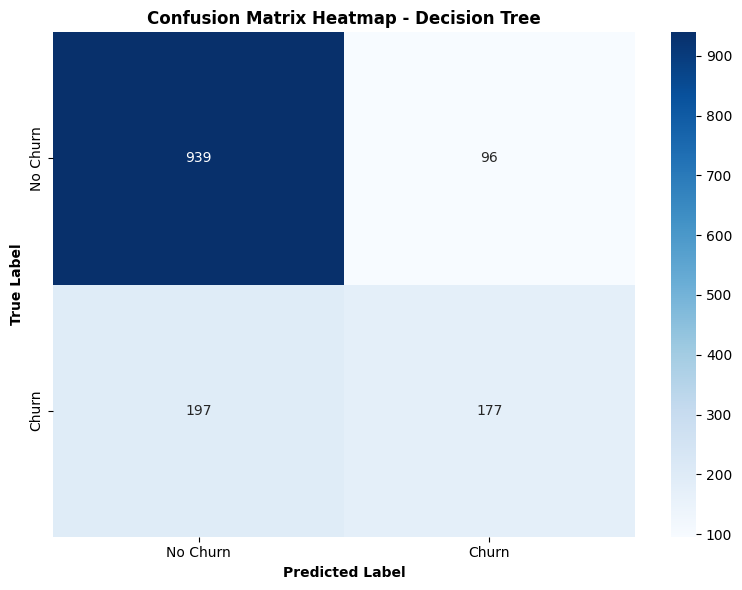


Metrics:
  Accuracy: 0.7921
  Precision: 0.6484
  Recall: 0.4733
  F1-Score: 0.5471
  ROC-AUC: 0.8276

Top 10 Important Features:
                        Feature  Importance
              Contract_Two year    0.360598
              Contract_One year    0.228817
                         tenure    0.130486
    InternetService_Fiber optic    0.127187
                 MonthlyCharges    0.038554
 PaymentMethod_Electronic check    0.036965
            StreamingMovies_Yes    0.032523
                   TotalCharges    0.031930
StreamingTV_No internet service    0.012940
                        Partner    0.000000


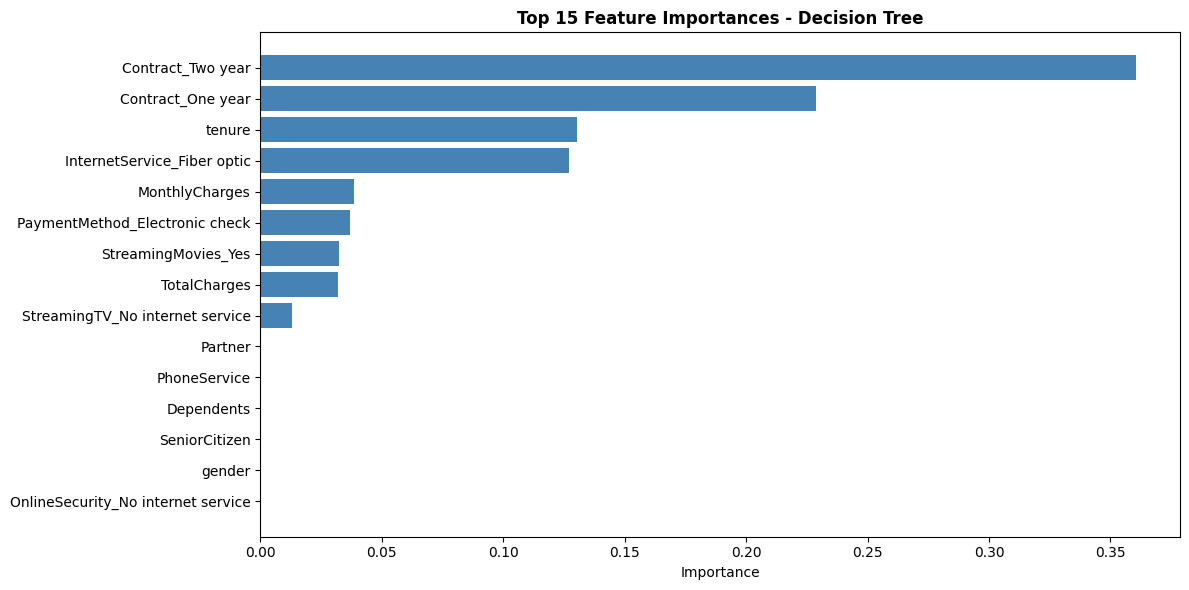

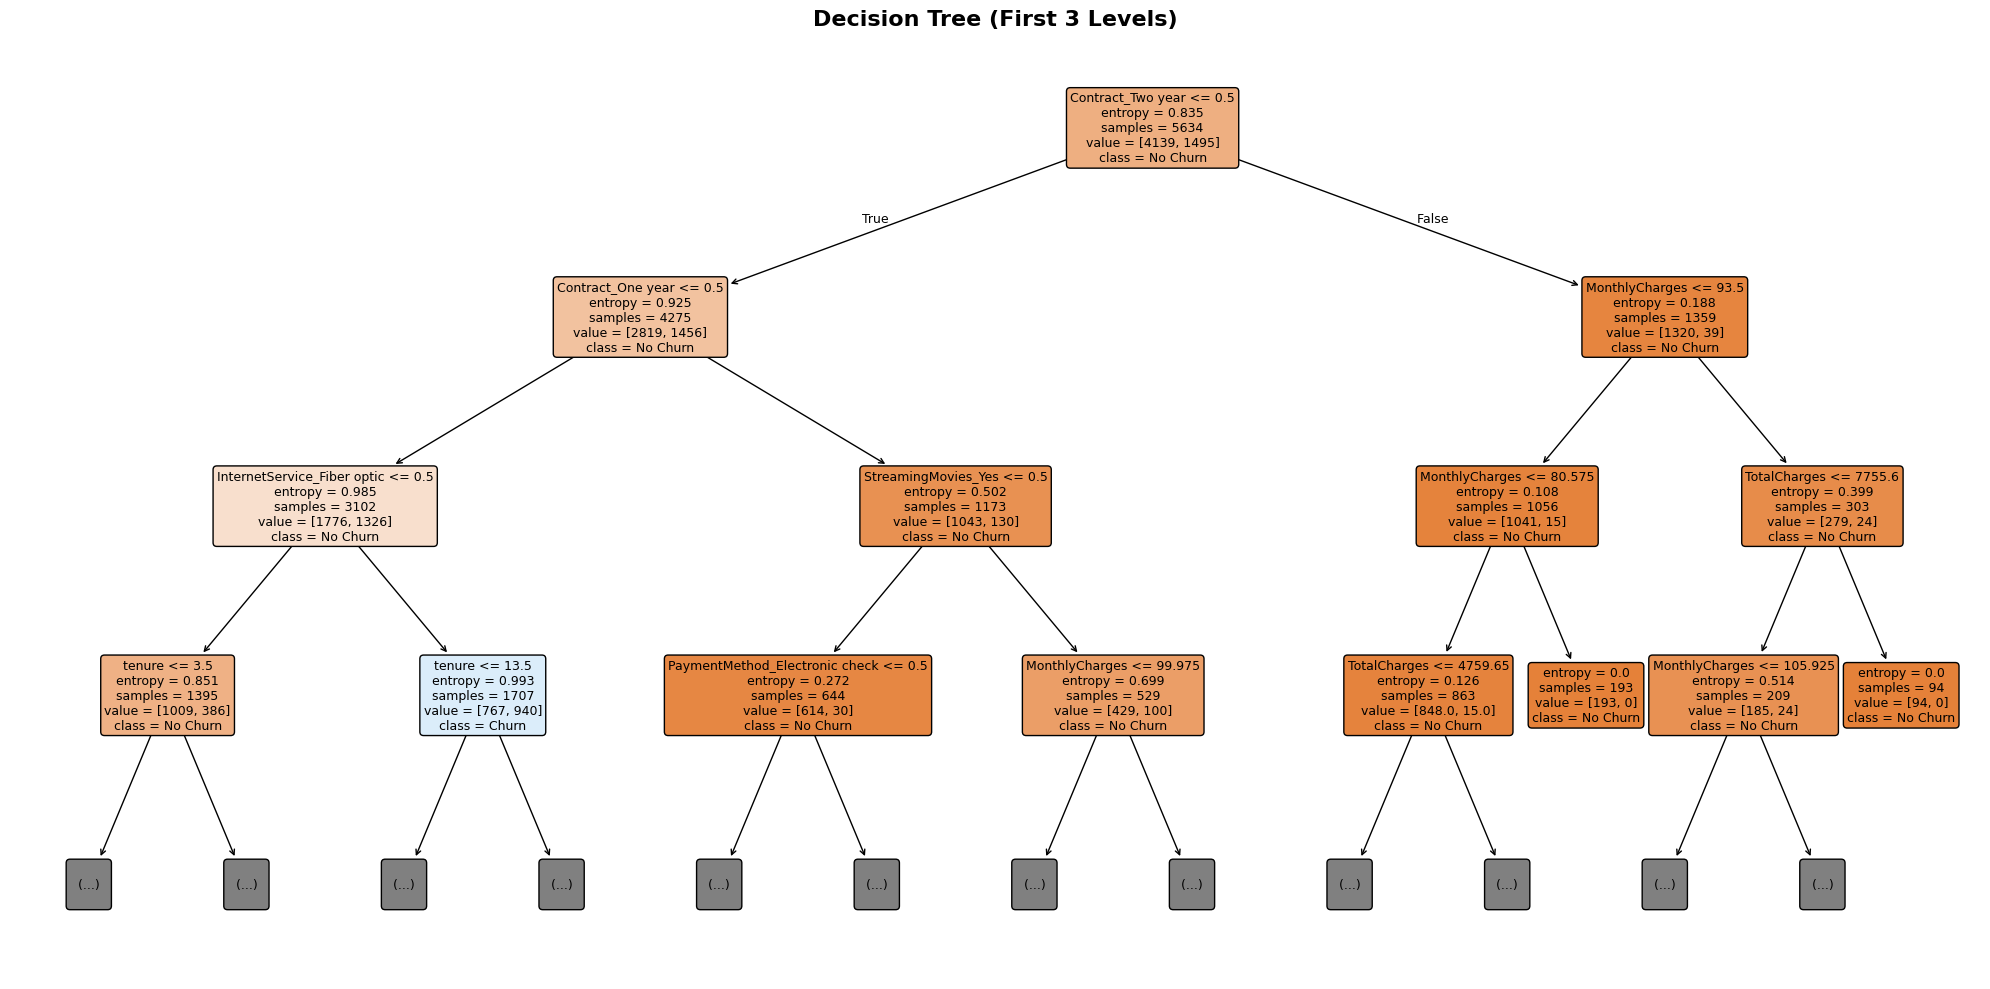

Class Weights: {0: np.float64(0.6805991785455424), 1: np.float64(1.8842809364548494)}

Hyperparameter Tuning...
Testing LR=0.001, Batch=32
  Validation AUC: 0.8340
Testing LR=0.0005, Batch=64
  Validation AUC: 0.8358

Best Config: LR=0.0005, Batch=64

Training final model...
Epoch 1/80
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6921 - auc: 0.6044 - loss: 0.8216 - val_accuracy: 0.7116 - val_auc: 0.7441 - val_loss: 0.5672 - learning_rate: 5.0000e-04
Epoch 2/80
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6816 - auc: 0.6660 - loss: 0.7022 - val_accuracy: 0.6531 - val_auc: 0.7662 - val_loss: 0.5718 - learning_rate: 5.0000e-04
Epoch 3/80
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6774 - auc: 0.7168 - loss: 0.6310 - val_accuracy: 0.6398 - val_auc: 0.7828 - val_loss: 0.5791 - learning_rate: 5.0000e-04
Epoch 4/80
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6740 - auc: 0.7343 - loss: 0.6099 - val_accuracy: 0.6318 - val_auc: 0.7969 - val_loss: 0.5891 - learn

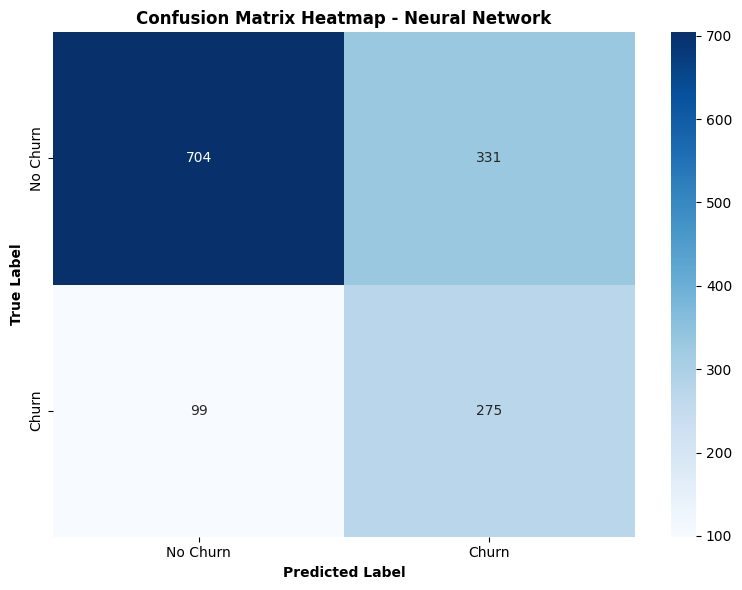


Metrics:
  Accuracy: 0.6948
  Precision: 0.4538
  Recall: 0.7353
  F1-Score: 0.5612
  ROC-AUC: 0.7563


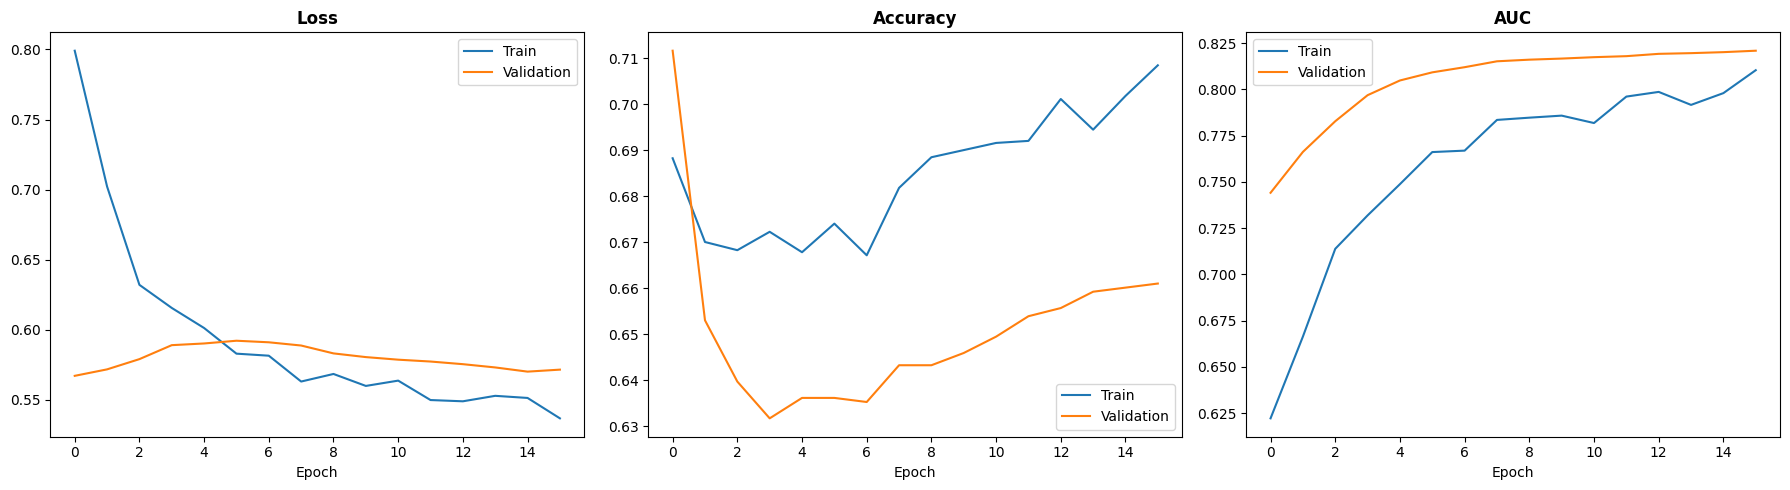


MODEL COMPARISON

   Metric  Decision Tree  Neural Network
 Accuracy       0.792051        0.694819
Precision       0.648352        0.453795
   Recall       0.473262        0.735294
 F1-Score       0.547141        0.561224
  ROC-AUC       0.827578        0.756341


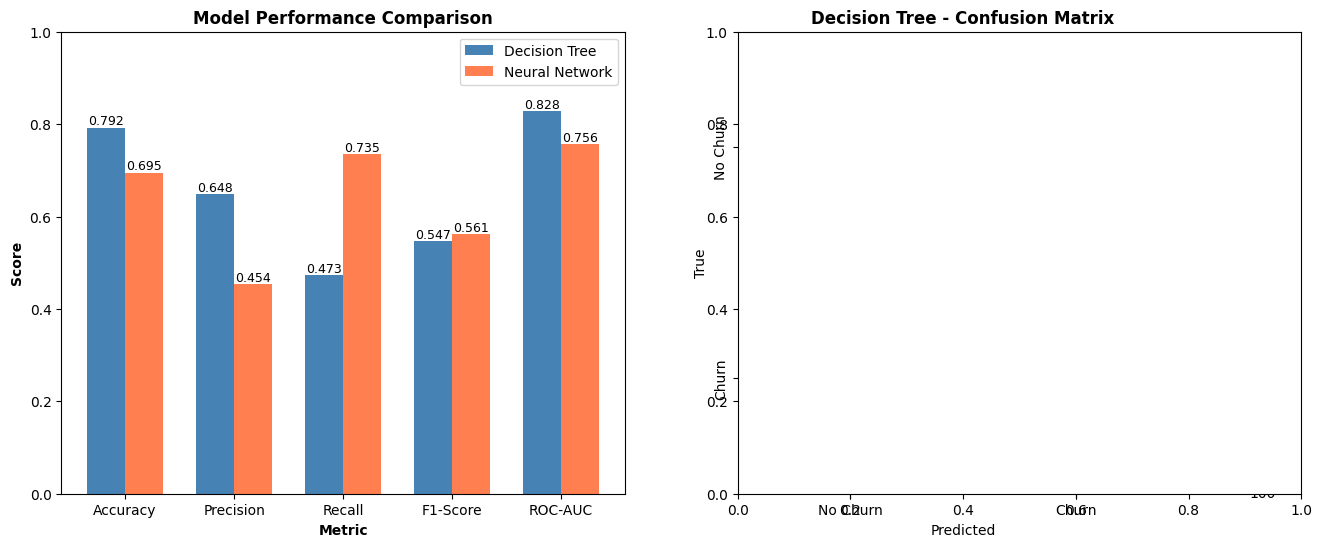

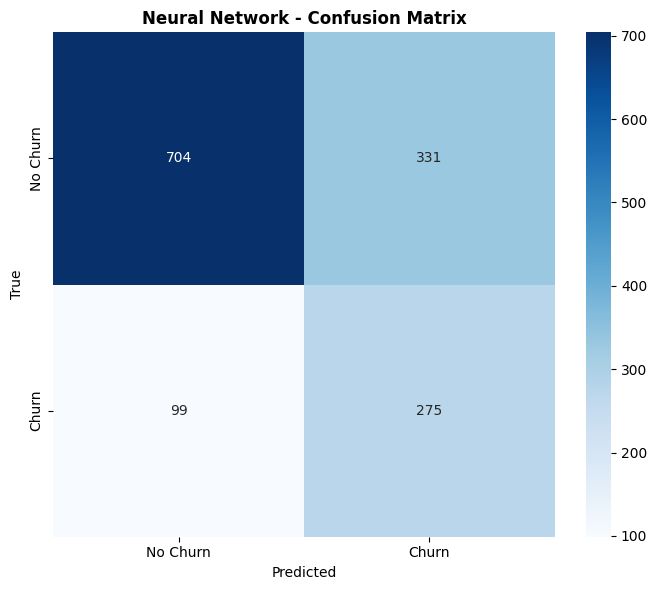

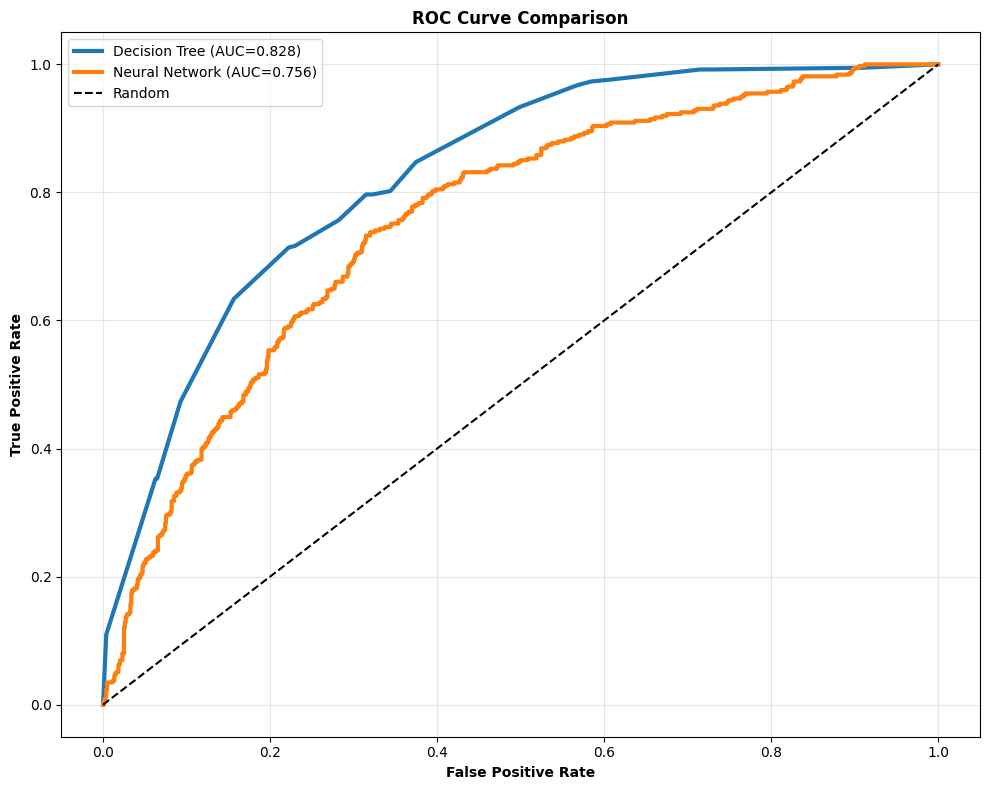


FINAL SUMMARY

Best Model: Decision Tree

Decision Tree - ROC-AUC: 0.8276
Neural Network - ROC-AUC: 0.7563

TASKS 1 & 2 COMPLETE


In [1]:
# ================================================================================
# TELCO CUSTOMER CHURN PREDICTION
# ================================================================================

!pip install -q scikit-learn tensorflow pandas numpy matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (classification_report, confusion_matrix,
                            accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, roc_curve, auc)
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

np.random.seed(42)
tf.random.set_seed(42)

print("Libraries imported successfully!")

# Load dataset from URL
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
df = pd.read_csv(url)

print(f"Dataset loaded: {df.shape}")
print(df.head())

# ================================================================================
# EXPLORATORY DATA ANALYSIS (EDA)
# ================================================================================

# Basic Info
print("\n--- Dataset Info ---")
df.info()
print(f"\nDataset shape: {df.shape}")
print(f"\nMissing values:\n{df.isnull().sum()}")

# Target Variable Analysis
print("\n--- Target Variable Distribution ---")
print(df['Churn'].value_counts())
print(f"\nChurn Rate: {df['Churn'].value_counts(normalize=True)['Yes']*100:.2f}%")

# Visualization 1: Churn Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
churn_counts = df['Churn'].value_counts()
axes[0].bar(churn_counts.index, churn_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Churn Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

axes[1].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%',
            startangle=90, colors=['#2ecc71', '#e74c3c'])
axes[1].set_title('Churn Percentage', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nInsight: Imbalanced dataset - 73% No Churn, 27% Churn")

# Numerical Features Analysis
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Visualization 2: Numerical Features Distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualization 3: Numerical Features vs Churn
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    df.boxplot(column=col, by='Churn', ax=axes[idx])
    axes[idx].set_title(f'{col} vs Churn', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Churn')
plt.suptitle('')
plt.tight_layout()
plt.show()

print("\nInsights:")
print("- Churned customers have lower tenure (shorter relationship)")
print("- Churned customers have higher monthly charges")
print("- Churned customers have lower total charges")

# Categorical Features Analysis
# Visualization 4: Key Features vs Churn
key_features = ['Contract', 'InternetService', 'PaymentMethod', 'OnlineSecurity']
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    churn_data = pd.crosstab(df[feature], df['Churn'], normalize='index') * 100
    churn_data.plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'])
    axes[idx].set_title(f'Churn Rate by {feature}', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].legend(['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

print("\nKey Findings:")
print("- Month-to-month contracts: ~42% churn rate (HIGHEST)")
print("- Fiber optic internet: Higher churn rate")
print("- Electronic check payment: Higher churn rate")
print("- No online security: Higher churn rate")

# Correlation Analysis
print("\n--- Correlation Analysis ---")
df_corr = df.copy()

# Encode categorical variables for correlation
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')

for col in categorical_cols:
    df_corr[col] = le.fit_transform(df_corr[col].astype(str))

df_corr = df_corr.drop('customerID', axis=1)
df_corr['TotalCharges'].fillna(df_corr['TotalCharges'].median(), inplace=True)

# Visualization 5: Correlation Heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, square=True)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Top correlations with Churn
churn_corr = correlation_matrix['Churn'].abs().sort_values(ascending=False)
print("\nTop 10 Features Correlated with Churn:")
print(churn_corr[1:11])

# Visualization 6: Tenure Groups Analysis
tenure_bins = [0, 12, 24, 36, 48, 60, 72]
df['TenureGroup'] = pd.cut(df['tenure'], bins=tenure_bins)
tenure_churn = pd.crosstab(df['TenureGroup'], df['Churn'], normalize='index') * 100

plt.figure(figsize=(10, 6))
tenure_churn.plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Churn Rate by Tenure Groups', fontsize=14, fontweight='bold')
plt.xlabel('Tenure (months)')
plt.ylabel('Percentage (%)')
plt.legend(['No Churn', 'Churn'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nInsight: Churn rate decreases significantly with tenure")

print("\n" + "="*80)
print("TASK 1 COMPLETE - EDA INSIGHTS SUMMARY")
print("="*80)
print("""
KEY FINDINGS:
1. Dataset is imbalanced (73% No Churn, 27% Churn)
2. Contract type is strongest predictor (month-to-month highest churn)
3. Tenure inversely correlated with churn
4. Monthly charges positively correlated with churn
5. Internet service type and payment method affect churn
6. Customers without add-on services churn more
""")

# =============================================================================
# DATA PREPROCESSING
# =============================================================================

print("\n" + "="*80)
print("DATA PREPROCESSING")
print("="*80)

df_processed = df.copy()

# Handle missing values
df_processed['TotalCharges'] = pd.to_numeric(df_processed['TotalCharges'], errors='coerce')
print(f"Missing TotalCharges: {df_processed['TotalCharges'].isnull().sum()}")

# direct assignment instead of inplace=True
df_processed['TotalCharges'] = df_processed['TotalCharges'].fillna(df_processed['TotalCharges'].median())

# Drop non-predictive columns
df_processed = df_processed.drop(['customerID', 'TenureGroup'], axis=1, errors='ignore')

# Encode binary variables
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df_processed[col] = df_processed[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

multi_class_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
df_processed = pd.get_dummies(df_processed, columns=multi_class_cols, drop_first=True, dtype=int)

# Encode target
df_processed['Churn'] = df_processed['Churn'].map({'Yes': 1, 'No': 0})

# Separate features and target
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

print(f"Features shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print("Preprocessing complete")

# =============================================================================
# DECISION TREE MODEL
# =============================================================================

# Hyperparameter tuning
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best CV ROC-AUC: {grid_search.best_score_:.4f}")

#final model training
dt_final = grid_search.best_estimator_
y_pred_dt = dt_final.predict(X_test)
y_pred_proba_dt = dt_final.predict_proba(X_test)[:, 1]

# Evaluation
print("\n--- DECISION TREE RESULTS ---")
print(classification_report(y_test, y_pred_dt, target_names=['No Churn', 'Churn']))

cm_dt = confusion_matrix(y_test, y_pred_dt)
print(f"Confusion Matrix:\n{cm_dt}")

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.ylabel('True Label', fontweight='bold')
plt.xlabel('Predicted Label', fontweight='bold')
plt.title('Confusion Matrix Heatmap - Decision Tree', fontweight='bold')
plt.tight_layout()
plt.show()

dt_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt),
    'Recall': recall_score(y_test, y_pred_dt),
    'F1-Score': f1_score(y_test, y_pred_dt),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_dt)
}

print("\nMetrics:")
for metric, value in dt_metrics.items():
    print(f"  {metric}: {value:.4f}")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_final.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance.head(10).to_string(index=False))

# Visualize Feature Importance
plt.figure(figsize=(12, 6))
top_15 = feature_importance.head(15)
plt.barh(range(len(top_15)), top_15['Importance'], color='steelblue')
plt.yticks(range(len(top_15)), top_15['Feature'])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances - Decision Tree', fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Visualize Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_final, max_depth=3, feature_names=X.columns,
          class_names=['No Churn', 'Churn'], filled=True, rounded=True, fontsize=9)
plt.title('Decision Tree (First 3 Levels)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# =============================================================================
# NEURAL NETWORK MODEL
# =============================================================================

# Calculating class weights
class_weights_array = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i: class_weights_array[i] for i in range(len(class_weights_array))}
print(f"Class Weights: {class_weights}")

# Model
def create_nn_model(input_dim, learning_rate=0.001):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.5),

        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        Dense(16, activation='relu'),
        Dropout(0.3),

        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )
    return model

# Hyperparameter tuning
print("\nHyperparameter Tuning...")
configs = [
    {'learning_rate': 0.001, 'batch_size': 32},
    {'learning_rate': 0.0005, 'batch_size': 64},
]

best_score = 0
best_config = None

for config in configs:
    print(f"Testing LR={config['learning_rate']}, Batch={config['batch_size']}")

    model = create_nn_model(X_train_scaled.shape[1], config['learning_rate'])

    history = model.fit(
        X_train_scaled, y_train,
        epochs=30,
        batch_size=config['batch_size'],
        validation_split=0.2,
        class_weight=class_weights,
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=0)
        ],
        verbose=0
    )

    _, _, val_auc = model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f"  Validation AUC: {val_auc:.4f}")

    if val_auc > best_score:
        best_score = val_auc
        best_config = config
        best_model = model

print(f"\nBest Config: LR={best_config['learning_rate']}, Batch={best_config['batch_size']}")

# final model training
print("\nTraining final model...")
nn_final = create_nn_model(X_train_scaled.shape[1], best_config['learning_rate'])

history = nn_final.fit(
    X_train_scaled, y_train,
    epochs=80,
    batch_size=best_config['batch_size'],
    validation_split=0.2,
    class_weight=class_weights,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=15, min_delta=0.001, restore_best_weights=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, verbose=1)
    ],
    verbose=1
)

# Evaluation
y_pred_proba_nn = nn_final.predict(X_test_scaled).flatten()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_nn)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"\nOptimal threshold: {optimal_threshold:.3f}")

y_pred_nn = (y_pred_proba_nn > optimal_threshold).astype(int)

print("\n--- NEURAL NETWORK RESULTS ---")
print(classification_report(y_test, y_pred_nn, target_names=['No Churn', 'Churn']))

cm_nn = confusion_matrix(y_test, y_pred_nn)
print(f"Confusion Matrix:\n{cm_nn}")

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.ylabel('True Label', fontweight='bold')
plt.xlabel('Predicted Label', fontweight='bold')
plt.title('Confusion Matrix Heatmap - Neural Network', fontweight='bold')
plt.tight_layout()
plt.show()

nn_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_nn),
    'Precision': precision_score(y_test, y_pred_nn),
    'Recall': recall_score(y_test, y_pred_nn),
    'F1-Score': f1_score(y_test, y_pred_nn),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_nn)
}

print("\nMetrics:")
for metric, value in nn_metrics.items():
    print(f"  {metric}: {value:.4f}")

# Training History
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(history.history['loss'], label='Train')
axes[0].plot(history.history['val_loss'], label='Validation')
axes[0].set_title('Loss', fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].legend()

axes[1].plot(history.history['accuracy'], label='Train')
axes[1].plot(history.history['val_accuracy'], label='Validation')
axes[1].set_title('Accuracy', fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].legend()

axes[2].plot(history.history['auc'], label='Train')
axes[2].plot(history.history['val_auc'], label='Validation')
axes[2].set_title('AUC', fontweight='bold')
axes[2].set_xlabel('Epoch')
axes[2].legend()

plt.tight_layout()
plt.show()

# =============================================================================
# MODEL COMPARISON
# =============================================================================

print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)

# Comparison table
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Decision Tree': [dt_metrics['Accuracy'], dt_metrics['Precision'],
                      dt_metrics['Recall'], dt_metrics['F1-Score'], dt_metrics['ROC-AUC']],
    'Neural Network': [nn_metrics['Accuracy'], nn_metrics['Precision'],
                       nn_metrics['Recall'], nn_metrics['F1-Score'], nn_metrics['ROC-AUC']]
})

print("\n" + comparison_df.to_string(index=False))

# Visualization: Metrics Comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

x = np.arange(len(comparison_df['Metric']))
width = 0.35

bars1 = axes[0].bar(x - width/2, comparison_df['Decision Tree'], width,
                    label='Decision Tree', color='steelblue')
bars2 = axes[0].bar(x + width/2, comparison_df['Neural Network'], width,
                    label='Neural Network', color='coral')

axes[0].set_xlabel('Metric', fontweight='bold')
axes[0].set_ylabel('Score', fontweight='bold')
axes[0].set_title('Model Performance Comparison', fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparison_df['Metric'])
axes[0].legend()
axes[0].set_ylim(0, 1)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# Confusion Matrices
cm_data = [cm_dt, cm_nn]
titles = ['Decision Tree', 'Neural Network']

for idx in range(2):
    ax = plt.subplot(1, 2, idx+1) if idx > 0 else axes[1]
    if idx > 0:
        fig2 = plt.figure(figsize=(7, 6))
        ax = plt.subplot(1, 1, 1)

    sns.heatmap(cm_data[idx], annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'])
    ax.set_title(f'{titles[idx]} - Confusion Matrix', fontweight='bold')
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')

plt.tight_layout()
plt.show()

# ROC Curves
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_proba_nn)

plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, linewidth=3, label=f'Decision Tree (AUC={dt_metrics["ROC-AUC"]:.3f})')
plt.plot(fpr_nn, tpr_nn, linewidth=3, label=f'Neural Network (AUC={nn_metrics["ROC-AUC"]:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold')
plt.title('ROC Curve Comparison', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Final Summary
print("\n" + "="*80)
print("FINAL SUMMARY")
print("="*80)

winner = 'Neural Network' if nn_metrics['ROC-AUC'] > dt_metrics['ROC-AUC'] else 'Decision Tree'
print(f"\nBest Model: {winner}")
print(f"\nDecision Tree - ROC-AUC: {dt_metrics['ROC-AUC']:.4f}")
print(f"Neural Network - ROC-AUC: {nn_metrics['ROC-AUC']:.4f}")

print("\n" + "="*80)
print("TASKS 1 & 2 COMPLETE")
print("="*80)